In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [2]:
import os
import pandas as pd

# Path to the folder containing CSV files
folder_path = "/home/debasish/Documents/YOLOv8/eigenworm_data/"

# Get all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Read and combine all CSV files into one DataFrame
df_combined = pd.concat(
    [pd.read_csv(os.path.join(folder_path, f)) for f in csv_files],
    ignore_index=True
)

# Optional: display shape and preview
print(f"Combined {len(csv_files)} CSV files.")
print(f"Resulting DataFrame shape: {df_combined.shape}")
df_combined.head()

Combined 157 CSV files.
Resulting DataFrame shape: (251403, 31)


,frame,obj_cls,obj_id,x,y,w,h,0,1,2,...,14,15,16,17,18,19,20,21,Unnamed: 0.1,Unnamed: 0
0,1.0,0.0,0.0,676.17896,515.76373,108.017580,77.508910,723.40027,481.77628,718.43054,...,660.80743,521.6924,648.99090,529.76940,639.03430,541.21760,630.27966,550.62537,NaN,NaN
1,2.0,0.0,7.0,676.85535,515.34080,109.325260,78.016815,725.60547,480.98910,719.44690,...,661.52203,521.9534,649.40576,529.30010,639.34520,540.51184,630.68180,550.01470,NaN,NaN
2,3.0,0.0,7.0,677.02660,515.27690,109.571170,78.120480,725.59250,480.99990,719.43730,...,661.53320,521.9512,649.40466,529.28790,639.33844,540.49900,630.67550,550.00790,NaN,NaN
3,4.0,0.0,7.0,677.09570,515.25000,109.640015,78.164276,725.61395,481.00550,719.45080,...,661.53800,521.9539,649.41797,529.27655,639.35645,540.48444,630.69670,549.99365,NaN,NaN
4,5.0,0.0,7.0,677.09796,515.24850,109.673460,78.174560,725.60990,480.99910,719.44300,...,661.54960,521.9670,649.42360,529.27410,639.34650,540.49110,630.67250,550.02050,NaN,NaN


In [3]:
data = df_combined.drop(["frame","obj_cls","obj_id","x","y","w","h"], axis=1)
data

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,Unnamed: 0.1,Unnamed: 0
0,723.40027,481.776280,718.43054,492.256040,717.43410,507.149200,716.01770,522.064500,707.55536,529.678960,...,660.80743,521.692400,648.99090,529.769400,639.03430,541.21760,630.27966,550.62537,NaN,NaN
1,725.60547,480.989100,719.44690,490.718570,717.65330,505.104370,716.22974,520.662100,708.06600,528.968000,...,661.52203,521.953400,649.40576,529.300100,639.34520,540.51184,630.68180,550.01470,NaN,NaN
2,725.59250,480.999900,719.43730,490.720200,717.64990,505.093700,716.23987,520.649660,708.09100,528.960750,...,661.53320,521.951200,649.40466,529.287900,639.33844,540.49900,630.67550,550.00790,NaN,NaN
3,725.61395,481.005500,719.45080,490.723270,717.65470,505.101620,716.23630,520.671140,708.07950,528.983030,...,661.53800,521.953900,649.41797,529.276550,639.35645,540.48444,630.69670,549.99365,NaN,NaN
4,725.60990,480.999100,719.44300,490.714080,717.64557,505.081970,716.23500,520.655640,708.09160,528.978100,...,661.54960,521.967000,649.42360,529.274100,639.34650,540.49110,630.67250,550.02050,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251398,952.72530,24.029861,940.14070,25.126076,926.72570,26.451284,917.71533,31.984426,918.56840,47.279163,...,899.49255,80.297676,881.57996,86.092040,875.02295,94.51300,875.74030,105.86384,NaN,NaN
251399,952.72820,24.044102,940.14160,25.135720,926.72380,26.461400,917.71075,31.997047,918.56586,47.294777,...,899.48920,80.297460,881.57820,86.092810,875.02246,94.51276,875.74194,105.85623,NaN,NaN
251400,952.75287,24.041092,940.18164,25.132395,926.75940,26.440554,917.72810,31.960165,918.56160,47.243473,...,899.51310,80.299420,881.58150,86.101530,875.01670,94.52161,875.74220,105.86377,NaN,NaN
251401,952.75040,24.041758,940.20416,25.127975,926.78516,26.423105,917.73890,31.934458,918.55600,47.196780,...,899.55090,80.291990,881.60420,86.113754,875.02856,94.54049,875.75540,105.87906,NaN,NaN


In [4]:
df = pd.DataFrame(data)
# df.to_csv("/home/debasish/Documents/YOLOv8/eigenworm_data/eigenworm_merged.csv")

In [5]:
import pandas as pd
import numpy as np
from scipy.interpolate import splprep, splev

def interpolate_keypoints(xy, num_points=100):
    xy = np.array(xy, dtype=float).reshape(-1, 2)
    x, y = xy[:, 0], xy[:, 1]

    distances = np.cumsum(np.sqrt(np.diff(x)**2 + np.diff(y)**2))
    distances = np.insert(distances, 0, 0)
    t = distances / distances[-1]

    tck, _ = splprep([x, y], u=t, s=0)
    t_interp = np.linspace(0, 1, num_points)
    x_new, y_new = splev(t_interp, tck)

    return np.vstack([x_new, y_new]).T  # returns shape: (100, 2)


data_array = data.to_numpy(dtype=float)
print("Raw shape:", data_array.shape)  # (N, 22)

try:
    data = data_array.reshape(-1, 11, 2)
except Exception as e:
    print("Reshape failed:", e)

# interpolate
interpolated = np.array([interpolate_keypoints(frame) for frame in data])
print("Interpolated shape:", interpolated.shape)

# Flatten for saving
flat_interpolated = interpolated.reshape(interpolated.shape[0], -1)

Raw shape: (251403, 24)
Reshape failed: cannot reshape array of size 6033672 into shape (11,2)


ValueError: cannot reshape array of size 1 into shape (2)

In [6]:
import numpy as np
from scipy.interpolate import splprep, splev

def interpolate_keypoints(xy, num_points=100, smoothness=0):
    xy = np.asarray(xy)

    # Compute cumulative arc length parameter
    distances = np.sqrt(np.sum(np.diff(xy, axis=0)**2, axis=1))
    arc_lengths = np.concatenate([[0], np.cumsum(distances)])
    arc_lengths /= arc_lengths[-1]  # normalize to [0, 1]

    # Fit a B-spline to the points (parametric form)
    tck, _ = splprep(xy.T, s=smoothness, u=arc_lengths)

    # Generate new points at equally spaced arc lengths
    new_u = np.linspace(0, 1, num_points)
    x_new, y_new = splev(new_u, tck)

    return np.stack([x_new, y_new], axis=1)

interpolated = np.array([
    interpolate_keypoints(frame, num_points=100)
    for frame in data
])  # shape: (N, 100, 2)

ValueError: diff requires input that is at least one dimensional

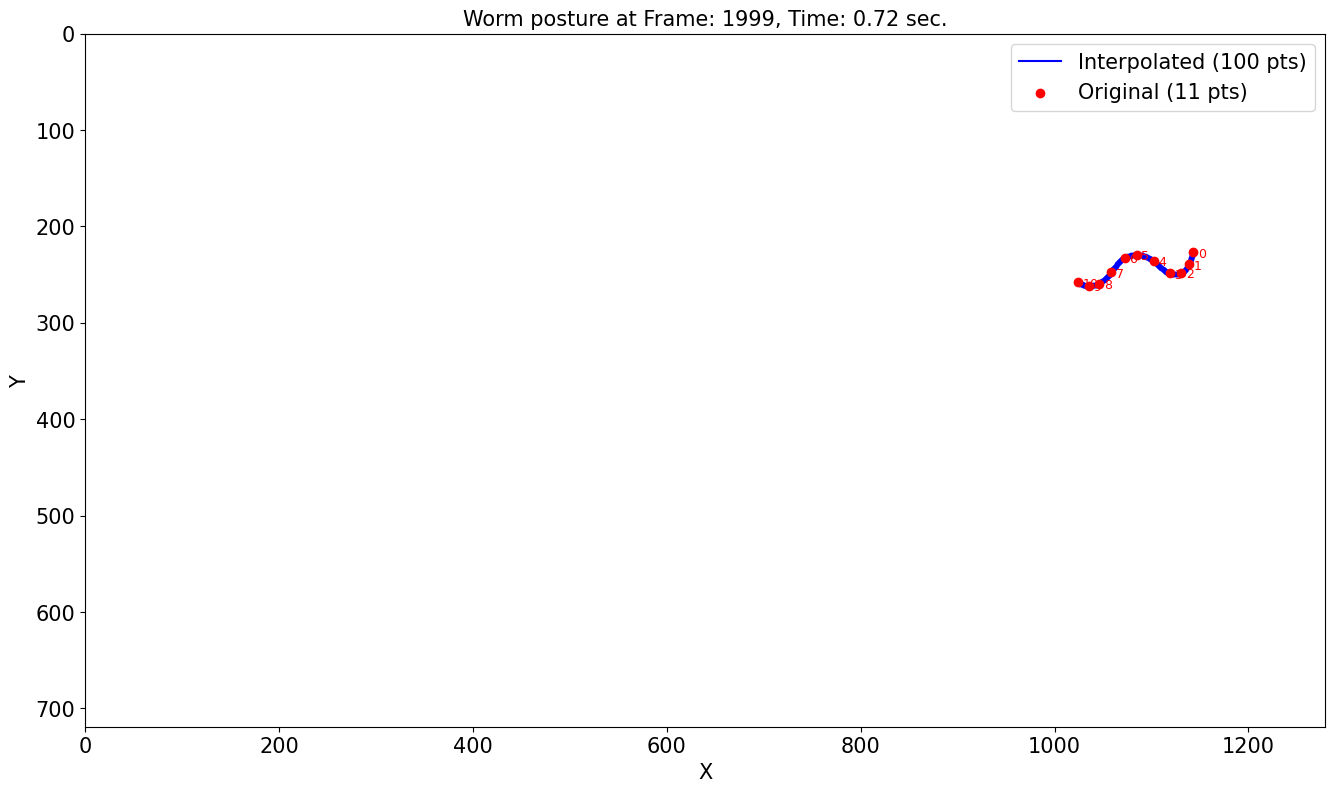

In [7]:
import matplotlib.pyplot as plt

# to visualize
frame_idx = 1999
N = data.shape[0]

# Original keypoints
original_frame = data[frame_idx]  # shape (11, 2)

# Interpolated keypoints (100 points)
interpolated_frame = interpolated[frame_idx]  # shape (100, 2)

plt.figure(figsize=(16, 9))
plt.plot(interpolated_frame[:, 0], interpolated_frame[:, 1], 'b-', label="Interpolated (100 pts)")
plt.scatter(interpolated_frame[:, 0], interpolated_frame[:, 1], color='blue', s=10)
plt.scatter(original_frame[:, 0], original_frame[:, 1], color='red', label="Original (11 pts)", zorder=5)

for i, (x, y) in enumerate(original_frame):
    plt.text(x + 5, y + 5, str(i), fontsize=9, color='red')

plt.title(f"Worm posture at Frame: {frame_idx}, Time: {np.round(frame_idx*30/N,2)} sec.",fontsize=15)
plt.xlabel("X",fontsize=15)
plt.ylabel("Y",fontsize=15)
plt.xlim(0,1279)
plt.ylim(719,0)
plt.legend(fontsize=15)
# plt.axis("equal")
# plt.grid(True)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

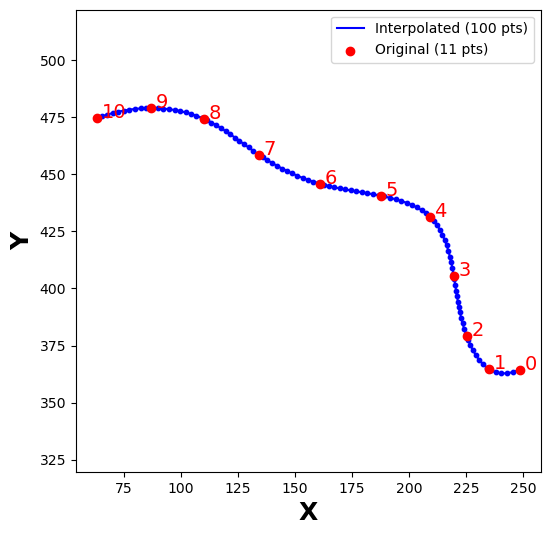

In [8]:
import matplotlib.pyplot as plt

# to visualize
frame_idx = 10000

# Original keypoints
original_frame = data[frame_idx]  # shape (11, 2)

# Interpolated keypoints (100 points)
interpolated_frame = interpolated[frame_idx]  # shape (100, 2)

plt.figure(figsize=(6, 6))
plt.plot(interpolated_frame[:, 0], interpolated_frame[:, 1], 'b-', label="Interpolated (100 pts)")
plt.scatter(interpolated_frame[:, 0], interpolated_frame[:, 1], color='blue', s=10)
plt.scatter(original_frame[:, 0], original_frame[:, 1], color='red', label="Original (11 pts)", zorder=5)

for i, (x, y) in enumerate(original_frame):
    plt.text(x + 2, y, str(i), fontsize=14, color='red')

# plt.title(f"Worm posture: Frame {frame_idx}")
plt.xlabel("X", fontsize=18, weight='bold')
plt.ylabel("Y", fontsize=18, weight='bold')
plt.legend()
plt.axis("equal")
# plt.grid(True)
plt.show()

In [9]:
interpolated.shape

(83801, 100, 2)

In [174]:
# import numpy as np

# def compute_tangent_angles(xy):
#     # Calculate angle of tangent vector at each point
#     dx = np.diff(xy[:, 0])
#     dy = np.diff(xy[:, 1])
#     angles = np.arctan2(dy, dx)
#     return angles

# # For example: select frames from index 100 to 500
# selected_range = interpolated[0:2000]  # shape: (401, n_points, 2)

# angle_matrix = np.array([
#     compute_tangent_angles(frame) for frame in selected_range
# ])
# angle_matrix -= angle_matrix.mean(axis=1, keepdims=True)

# cov_matrix = np.cov(angle_matrix, rowvar=False)

In [10]:
import numpy as np

def compute_tangent_angles(xy):
    # calculating angle of tangent vectors at each keypoint
    dx = np.diff(xy[:, 0])
    dy = np.diff(xy[:, 1])
    angles = np.arctan2(dy, dx)
    angles = np.unwrap(angles) 
    return angles

# range of frames 
selected_range = interpolated[0:] 
angle_matrix = np.array([compute_tangent_angles(frame) for frame in selected_range])
angle_matrix -= angle_matrix.mean(axis=1, keepdims=True) # making the angles orientation independent
cov_matrix = np.cov(angle_matrix, rowvar=False) # covariance matrix

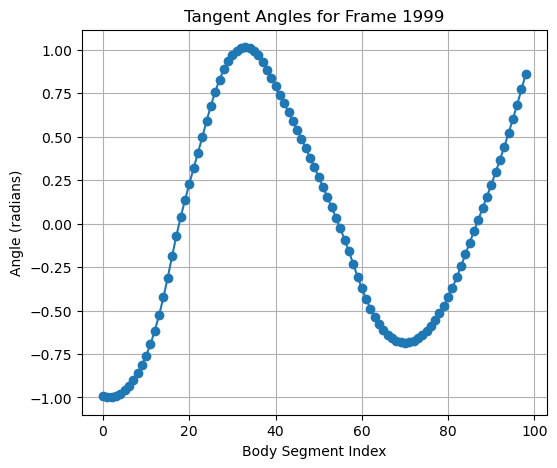

In [11]:
import matplotlib.pyplot as plt

def plot_tangent_angles(angles, frame_idx):

    n_segments = angles.shape[1]
    body_index = np.arange(n_segments)
    
    plt.figure(figsize=(6, 5))
    plt.plot(body_index, angles[frame_idx], marker='o')
    plt.title(f"Tangent Angles for Frame {frame_idx}")
    plt.xlabel("Body Segment Index")
    plt.ylabel("Angle (radians)")
    plt.grid(True)
    # plt.savefig("angles.png")
    plt.show()

plot_tangent_angles(angle_matrix, 1999)  # can change the frame number

Head angle (segment 0) in frame 10000: 0.9122 radians


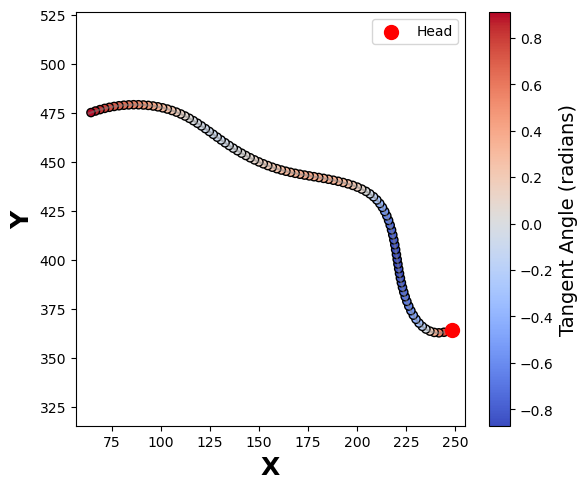

In [12]:
import matplotlib.pyplot as plt
import numpy as np

def plot_worm_colored_by_angles(interpolated_data, angles, frame_idx, cmap='coolwarm'):
    
    coords = interpolated_data[frame_idx]           # (100, 2)
    seg_coords = (coords[:-1] + coords[1:]) / 2     # midpoint of each segment (for coloring)
    segment_angles = angles[frame_idx]  
    
    head_angle = angles[frame_idx, 0]
    head_coord = coords[0]  # coordinates of the head
    print(f"Head angle (segment 0) in frame {frame_idx}: {head_angle:.4f} radians")

    plt.figure(figsize=(6, 5))
    scatter = plt.scatter(seg_coords[:, 0], seg_coords[:, 1], c=segment_angles, cmap=cmap, s=35, edgecolors='k')
    plt.plot(coords[:, 0], coords[:, 1], color='gray', alpha=0.5, linewidth=1.5)
    plt.scatter(head_coord[0], head_coord[1], color='red', s=100, label='Head', zorder=5) # head
    # Add colorbar with label
    cbar = plt.colorbar(scatter)
    cbar.set_label("Tangent Angle (radians)", fontsize=14)
    # plt.title(f"Worm Shape Colored by Tangent Angles (Frame {frame_idx})")
    plt.xlabel("X", fontsize=18, weight='bold')
    plt.ylabel("Y", fontsize=18, weight='bold')
    plt.axis("equal")
    # plt.grid(True)
    plt.legend()
    plt.tight_layout()
    # plt.savefig("tangent_angles.png")
    plt.show()

plot_worm_colored_by_angles(interpolated, angle_matrix, 10000)

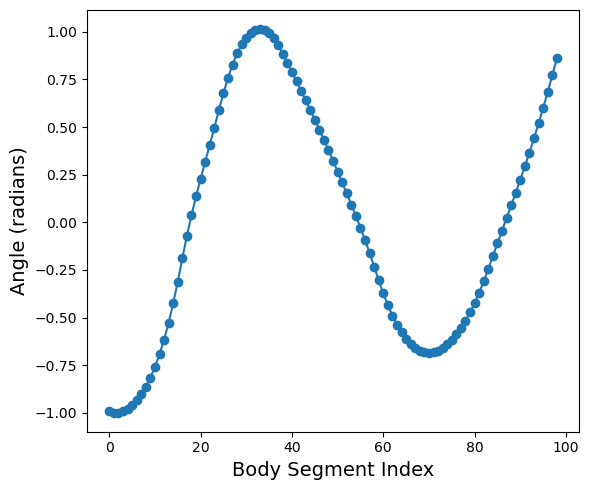

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# def plot_tangent_angles(angles, frame_idx=0, remove_orientation=True):

body_index = np.arange(angle_matrix.shape[1])
angle_data = angle_matrix[1999]
angle_data = angle_data - np.mean(angle_data)

plt.figure(figsize=(6, 5))
plt.plot(body_index, angle_data,'o-')
# plt.title("Angles independent of the orientation")
plt.xlabel("Body Segment Index", fontsize=14)
plt.ylabel("Angle (radians)", fontsize=14)
# plt.grid(True)
plt.tight_layout()
plt.show()

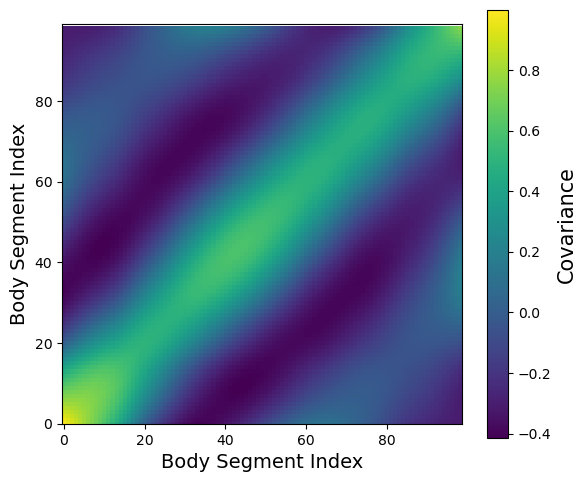

In [14]:
import numpy as np

def compute_covariance_matrix(angles_no_orientation):
    
    centered_data = angles_no_orientation - np.mean(angles_no_orientation, axis=0)
    cov_matrix = np.dot(centered_data.T, centered_data) / (centered_data.shape[0] - 1)
    return cov_matrix

cov_matrix = compute_covariance_matrix(angle_matrix)

plt.figure(figsize=(6, 5))
im = plt.imshow(cov_matrix, cmap='viridis')
# plt.title("Covariance Matrix of Tangent Angles")
plt.xlabel("Body Segment Index", fontsize=14)
plt.ylabel("Body Segment Index", fontsize=14)
# Create colorbar and set label font size
cbar = plt.colorbar(im)
cbar.set_label("Covariance", fontsize=15)
plt.ylim(0,99)
plt.tight_layout()
plt.show()

In [15]:
cov_matrix

array([[ 0.9983847 ,  0.96097136,  0.92258628, ..., -0.30207442,
        -0.30585347, -0.30793483],
       [ 0.96097136,  0.93087127,  0.89945542, ..., -0.29874902,
        -0.30457057, -0.30885018],
       [ 0.92258628,  0.89945542,  0.87479292, ..., -0.29509928,
        -0.30285091, -0.30921018],
       ...,
       [-0.30207442, -0.29874902, -0.29509928, ...,  0.63008511,
         0.6506818 ,  0.66999894],
       [-0.30585347, -0.30457057, -0.30285091, ...,  0.6506818 ,
         0.67789735,  0.70400823],
       [-0.30793483, -0.30885018, -0.30921018, ...,  0.66999894,
         0.70400823,  0.73738442]])

In [16]:
w, v = np.linalg.eigh(cov_matrix)

sort = np.argsort(w)[::-1]
w = w[sort]
v = v[:,sort]

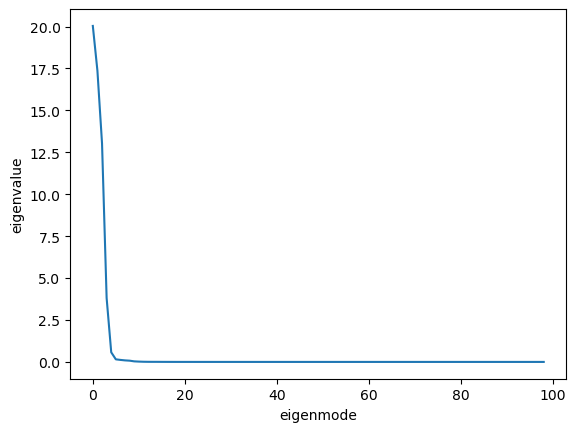

In [17]:
plt.figure()
plt.plot(w)
plt.xlabel('eigenmode')
plt.ylabel('eigenvalue')
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_53126/1427631471.py:9: SyntaxWarning: invalid escape sequence '\s'
  plt.ylabel('$\sigma_{K}^{2}$', fontsize=14)


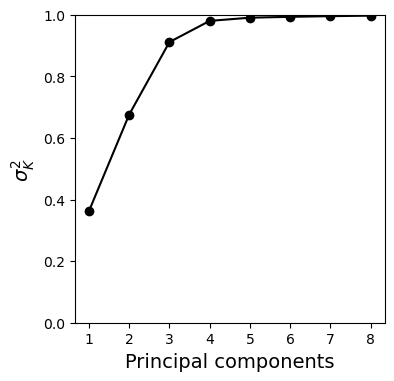

In [18]:
w = w / np.sum(w)    # normalized eigenvalues = variance along each principal component
wsum = np.cumsum(w)    # cumulative sum of normalized eigenvalues = variance captured

plt.figure(figsize=(4,4))
plt.plot(np.arange(1,9), wsum[:8], 'o-', color='black')
plt.ylim(0, 1)
plt.xticks(np.arange(1,9))
plt.xlabel('Principal components', fontsize=14)
plt.ylabel('$\sigma_{K}^{2}$', fontsize=14)
# plt.axhline(0.95, color='red',ls='--',lw=1)
# plt.axhline(1, color='blue',ls='-',lw=1)
# plt.text(8.5,0.94,'95%',color='red')
# plt.text(8.5,0.98,'100%',color='blue')
# plt.ylim(0,1.02)
plt.show()

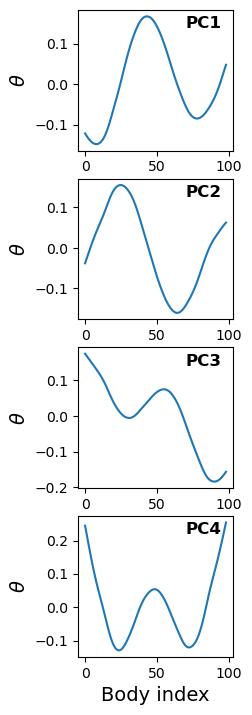

In [19]:
K = 4    # number of principal components to use
PC = v[:,:K]    # eigenvectors for these PCs; each column is one PC

fig, ax = plt.subplots(K, 1, figsize=(2, 2.1*K))
for i in range(K):
    ax[i].plot(PC[:,i])
    # ax[i].text(f'PC{i+1}')
ax[0].text(70,0.14, 'PC1', fontsize=12, weight='bold')
ax[1].text(70,0.125, 'PC2', fontsize=12, weight='bold')
ax[2].text(70,0.14, 'PC3', fontsize=12, weight='bold')
ax[3].text(70,0.22, 'PC4', fontsize=12, weight='bold')
ax[0].set_ylabel('$\\theta$', fontsize=14)
ax[1].set_ylabel('$\\theta$', fontsize=14)
ax[2].set_ylabel('$\\theta$', fontsize=14)
ax[3].set_ylabel('$\\theta$', fontsize=14)
ax[3].set_xlabel('Body index', fontsize=14)
# plt.savefig("eigenmodes.png")
plt.show()

In [35]:
def angle2pos(angles):
    """
    convert from angles of consecutive segments of unit length to positions of their endpoints.
    inputs:
    angles: 1-d array, angles of consecutive segments.
    outputs:
    pos: 2-d array, each row is (x,y) coordinates of an endpoint, centered at zeros.
    """
    dx = np.cos(angles)
    dy = np.sin(angles)
    xsum = np.cumsum(dx)
    ysum = np.cumsum(dy)
    pos = np.zeros((100, 2))
    pos[1:,0] = xsum
    pos[1:,1] = ysum
    mean = np.mean(pos, axis=0)
    pos = pos - mean
    return pos

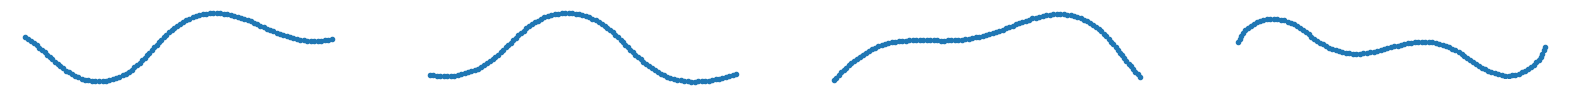

In [36]:
pos_all = []
K = 4
for i in range(K):
    pos = angle2pos(PC[:,i]*5)    # convert PC (with amplitude 5) to positions
    pos_all.append(pos)

fig, ax = plt.subplots(1,K, figsize=(5*K,4))
for i in range(K):
    pos = pos_all[i]
    ax[i].plot(pos[:,0], pos[:,1], '.-')
    ax[i].set_aspect('equal')
    ax[i].axis('off')
plt.show()

In [37]:
x_project = np.dot(angle_matrix, PC)    # project (centered) data onto principal components
x_reconstruct = np.dot(x_project, PC.T)    # reconstruct data from the projections

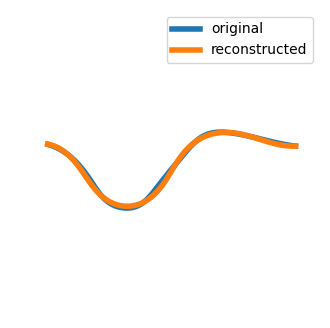

In [44]:
pos_original = angle2pos(angle_matrix[0,:])    # original data from one frame
pos_reconstruct = angle2pos(x_reconstruct[0,:])    # reconstructed data

plt.figure(figsize=(4,4))
plt.plot(pos_original[:,0], pos_original[:,1], linewidth=4, label='original')
plt.plot(pos_reconstruct[:,0], pos_reconstruct[:,1], linewidth=4, label='reconstructed')
plt.xlim(-50, 50)
plt.ylim(-50, 50)
plt.legend()
plt.axis('off')
plt.show()